<a href="https://colab.research.google.com/github/sebfoe/cloud_computing_2023/blob/main/Colab/ODC_and_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a name="top"></a>
# Getting Started: Open Data Cube on Google Colab

1.   [Open Data Cube Framework](#ODC-Framework)
2.   [Google Colab and Jupyter Notebooks](#what-is)
3.   [Products and Measurements](#products-measurements)
4.   [How to Load Data](#How-to-Load-Data)
5.   [Explore More Applications](#explore-applications)
6.   [Reference Links](#reference-links)


<a name="ODC-Framework"></a>
# 1. Open Data Cube Framework

The Open Data Cube (ODC, [opendatacube.org](https://www.opendatacube.org/)) is a software framework with the objective of:

> ... increasing the impact of satellite data by providing an open and freely accessible exploitation tool, and to foster a community to develop, sustain, and grow the breadth and depth of applications.

An ODC instance is made up of data, a mechanism to index that data (e.g. database), and an open source Python code base making use of a wide variety of Python libraries. A more detailed introduction and some history of the ODC can be found [here](https://medium.com/opendatacube/what-is-open-data-cube-805af60820d7).







![ODC framework](https://miro.medium.com/max/700/1*2XgL8GGYEvDcOpiqZaWJ7Q.png)

The ODC framework can run on a wide variety of infrastructure from a simple Docker instance running on a laptop computer scaling up to continential coverage (e.g. [Digital Earth Afica](https://www.digitalearthafrica.org/)). This notebook is intended to give you an introduction to the ODC running on the Google Colab plaform, and utilising data from the [Google Earth Engine Catalog](https://developers.google.com/earth-engine/datasets).

The notebook provides:

*   A quick introduction to Jupyter notebooks and the Colab environment (with links to read more)
*   A worked example of how to configure an ODC connection from Google Colab
*   An example listing of the products and measurements available
*   How to load some sample data

This is intended as a familarisation and training resource, and we hope it will help start your journey with ODC!

[Back to the top](#top)

<a name="what-is"></a>
# 2. Google Colab and Jupyter Notebooks

Google Colaboratory (or Google Colab, [colab.research.google.com](https://colab.research.google.com)) is an environment that allows anybody to write and execute arbitrary Python code through the browser, and is especially well suited to machine learning, data analysis and education. Colab is a hosted Jupyter Notebook service, where 'Notebooks' (like this one) containing live code, equations, visualizations and narrative text can be shared. You can read more about these environments in the [reference links below](#reference-links).

While Jupyter notebooks are relatively intuitive, if you don't understand what the code and cells below are, then a quick read of the [features overview](https://colab.research.google.com/notebooks/basic_features_overview.ipynb) should help get you strated. You can also find an alternative description [here](https://geekflare.com/de/google-colab/).

Loading the satellite datasets used by this notebook requires a [Google Earth Engine](https://earthengine.google.com/) account. These accounts are free to setup, and the steps required are described [here](https://www.openearthalliance.org/sandbox).

Google Colab has a number of drawbacks however – especially when it comes to limitations on the free plan, limitations with GPU availability and performance, and limitations with Colab's version of a Jupyter notebook interface.

***Finally, one important note. This is a sandbox environment. Feel free to experiment! From time to time, you might see errors. That's OK - you can't break anything in here. And you can always start anew by [reloading the Notebook](https://colab.research.google.com/github/ceos-seo/odc-colab/blob/master/notebooks/01.01.Getting_Started_ODC_and_Colab.ipynb). If you have questions feel free to ask!

Now, onto the code...! First, a quick test: try running this cell. (If you're not sure how, [try this](https://colab.research.google.com/notebooks/basic_features_overview.ipynb).)

In [ ]:
print('Push [shift] + [enter] to run this cell - now you are ready to Go!')

Push [shift] + [enter] to run this cell - now you are ready to Go!


Having run the cell above, you will have initialised your Google Colab environment, and are now ready to setup your ODC instance.

The next code block provides Colab with access to your Google Drive to store content and results. *It will ask you to click on an authentication link, and then paste an authentication code back into the notebook cell.* The steps for the process are shown below:

<img src="https://raw.githubusercontent.com/ceos-seo/odc-colab/master/images/Google%20Drive%20Auth%20Info.png" width="100%">


Mount your Google Drive for using it inside Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now that you've setup the link to Google Drive, the next cell will grab the Python libraries necessary to run ODC on Google Colab. This is based on the [ODC-Colab](https://github.com/ceos-seo/odc-colab) repository build by the CEOS Systems Engineering Office.

In [ ]:
!wget -nc https://raw.githubusercontent.com/ceos-seo/odc-colab/master/odc_colab.py
from odc_colab import odc_colab_init
odc_colab_init(install_odc_gee=True)

--2023-06-14 08:32:02--  https://raw.githubusercontent.com/ceos-seo/odc-colab/master/odc_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15880 (16K) [text/plain]
Saving to: ‘odc_colab.py’

odc_colab.py        100%[===================>]  15.51K  --.-KB/s    in 0.001s  

2023-06-14 08:32:03 (15.3 MB/s) - ‘odc_colab.py’ saved [15880/15880]

Module utils was not found; cloning https://github.com/ceos-seo/data_cube_utilities.git to CWD...
Package postgresql was not found; installing it...
Module odc-gee was not found; cloning https://github.com/ceos-seo/odc-gee.git to CWD...


The next code block will populate the ODC data index allowing ODC to access data from the [Google Earth Engine Catalog](https://developers.google.com/earth-engine/datasets).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from odc_colab import populate_db
populate_db()

No database file supplied. Downloading default index.
Cleaned up extracted database files.


This next code block will establish the connection to the Google Earth Engine datasets. *As above, it will ask you to click on an authentication link, and then paste an authentication code back into the notebook cell.* The steps for the process are shown below:

<img src="https://raw.githubusercontent.com/ceos-seo/odc-colab/master/images/GEE%20Auth%20Info.png" width="100%">

Following that, the block loads a couple of key Python librarires used later in the Notebook.

In [ ]:
# Suppress Warning Messages
import warnings
warnings.filterwarnings('ignore')

# Load Data Cube Configuration
from odc_gee import earthengine
dc = earthengine.Datacube(app='Getting_Started_loading_data')

# Import Data Cube API
import utils.data_cube_utilities.data_access_api as dc_api
api = dc_api.DataAccessApi()

# Import Utilities
import xarray as xr

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=9C6Crk8YnHmkriMiwPgTvhu3DPQE-ttQpiYD0DxMA8k&tc=vXiUcqyfhlmL8FSRLxIXl4TCit_0P7k_QiUB0F4ZTSU&cc=0AwKiJLNgVlzr0DmCIfzV-r-5hJCR9Cr8Xed7LNw7T0

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AbUR2VMWZv2pkKN_Yz2Ij34JAZUuJBkI25R_fANKmLlj7uNU1-wjjQCJhk4

Successfully saved authorization token.


/usr/local/lib/python3.10/dist-packages/datacube/drivers/postgres/_connections.py:81: SADeprecationWarning: Calling URL() directly is deprecated and will be disabled in a future release.  The public constructor for URL is now the URL.create() method.
  EngineUrl(
/usr/local/lib/python3.10/dist-packages/datacube/drivers/postgres/_connections.py:81: SADeprecationWarning: Calling URL() directly is deprecated and will be disabled in a future release.  The public constructor for URL is now the URL.create() method.
  EngineUrl(


Now we have an ODC instance established with a connection to data!

[Back to the top](#top)

<a name="products-measurements"></a>
# 3. Products and Measurements

Within this ODC instance, 'products' refer to satellites (platform), and their instruments. To see what products are available, you can run the following command.

In [ ]:
products = dc.list_products()

display_columns = ["name",
                   "description",
                   "platform",
                   "instrument",
                   "crs",
                   "resolution"]

products[display_columns].sort_index()

,name,description,platform,instrument,crs,resolution
id,,,,,,
1,ls8_google,<p>This dataset is the atmospherically correct...,LANDSAT_8,OLI/TIRS,EPSG:4326,"(-0.000269493352, 0.000269493352)"
2,s1_google,<p>The Sentinel-1 mission provides data from a...,Sentinel-1A,C-SAR,EPSG:4326,"(-8.98311175e-05, 8.98311175e-05)"
3,s2_google,"<p>Sentinel-2 is a wide-swath, high-resolution...",Sentinel-2A,MSI,EPSG:4326,"(-8.98311175e-05, 8.98311175e-05)"
4,ls7_google,<p>This dataset is the atmospherically\ncorrec...,LANDSAT_7,ETM,EPSG:4326,"(-0.000269493352, 0.000269493352)"
5,viirs_google,<p>Monthly average radiance composite images u...,VIIRS,DNB,EPSG:4326,"(-0.00416666667, 0.00416666667)"
6,palsar_google,<p>The global 25m PALSAR/PALSAR-2 mosaic is a ...,ALOS,SAR,EPSG:4326,"(-0.000224577794, 0.000224577794)"
7,proba_google,<p>The Copernicus Global Land Service (CGLS) i...,PROBA-V,CGLS-LC,EPSG:4326,"(-0.000898311175, 0.000898311175)"
8,era5_land_google,<p>ERA5-Land is a reanalysis dataset providing...,ECMWF,ERA5_LAND,EPSG:4326,"(-0.1, 0.1)"
9,esa_worldcover_google,<p>The European Space Agency (ESA) WorldCover ...,ESA,WorldCover,EPSG:4326,"(-8.98311e-05, 8.98311e-05)"


<a name="platform"></a>
For each of the products available, there are a number of measurements available. These measurements correspond to the various 'bands' collected by the satellite instrument. In some cases, these are radar bands, or other derived layers such as a cloud mask.

You can see a list of measurements by running the command below. Have a play to try different products (from the code block above), but note that the example below is set to run using the Landsat product `ls8_c2_google`.

In [ ]:
product = "ls8_c2_google"

measurements = dc.list_measurements()
measurements.loc[product]

,name,dtype,units,nodata,aliases,flags_definition,add_offset,scale_factor
measurement,,,,,,,,
SR_B1,SR_B1,uint16,,0.0,"[ultra_blue, band_1, sr_b1]",NaN,-0.2,0.000028
SR_B2,SR_B2,uint16,,0.0,"[blue, band_2, sr_b2]",NaN,-0.2,0.000028
SR_B3,SR_B3,uint16,,0.0,"[green, band_3, sr_b3]",NaN,-0.2,0.000028
SR_B4,SR_B4,uint16,,0.0,"[red, band_4, sr_b4]",NaN,-0.2,0.000028
SR_B5,SR_B5,uint16,,0.0,"[nir, band_5, sr_b5]",NaN,-0.2,0.000028
SR_B6,SR_B6,uint16,,0.0,"[swir1, band_6, sr_b6]",NaN,-0.2,0.000028
SR_B7,SR_B7,uint16,,0.0,"[swir2, band_7, sr_b7]",NaN,-0.2,0.000028
ST_B10,ST_B10,uint16,Kelvin,0.0,"[tirs1, band_10_brightness_temperature, st_b10]",NaN,149.0,0.003418
SR_QA_AEROSOL,SR_QA_AEROSOL,uint8,,0.0,"[sr_aerosol, aerosol_attributes, sr_qa_aerosol]","{'fill': {'bits': [0], 'values': {}, 'desctipt...",NaN,NaN


<a name="How-to-Load-Data"></a>
# 4. How to Load Data

Now that you are familar with the basics of ODC and Colab, let's try loading some data and plotting an image.

Loading data requires the use of the `dc.load()` function from the [datacube documentation](https://datacube-core.readthedocs.io/en/latest/dev/api/generate/datacube.Datacube.load.html). Below we give an example of how to use this function, using the Landsat-8 product `ls8_google`. You can also use other products from the table you generated above.

In [ ]:
# Define the Product and Platform
# This data is indexed from Google Earth Engine data sources

product = "ls8_google"
platform = "LANDSAT_8"

We now need to choose where on Earth we want to look and when. Be careful of the box size and time range you choose - the more data, the longer the code will take to run! We found that the following parameters give output within a couple of minutes.

The analysis region should be given by a tuple of latitudes and a tuple of longnitudes that specify the sides of the region. Below we calculate the box sides by specifying a box centre and size (in degrees).

Below we load data for the city of Wurzburg, Germany for all of 2020, by specifying a box centre and size.

<a name="change_lat_lon"></a>

In [22]:
# MODIFY HERE
# Select an analysis region (Latitude-Longitude). Values should be defined from MIN to MAX (left to right)

# Specify box centre and box size in degrees.
# Example: Wuerzburg, Germany
lat_long = (49.750, 9.940)
box_size_deg = 0.125
latitude = (lat_long[0]-box_size_deg/2, lat_long[0]+box_size_deg/2)
longitude = (lat_long[1]-box_size_deg/1, lat_long[1]+box_size_deg/1)

print('Latitude corners: ' + str(latitude))
print('Longitude corners: ' + str(longitude))

# Define Time Range - Select a time period within the extents of the dataset (Year-Month-Day)
# Landsat-8 time range: 07-Apr-2013 to current
time_extents = ('2020-01-01', '2020-12-31')

Latitude corners: (49.6875, 49.8125)
Longitude corners: (9.815, 10.065)


The code below renders a map that can be used to view the region selected above. To choose a new region, use the mouse to explore the map, and click on the map to view Lat-Lon coordinates of any location that could define the box center or edges.

In [23]:
from utils.data_cube_utilities.dc_display_map import display_map
display_map(latitude,longitude)

### Xarray and dc.load()

in

```
# Load data using
ds = dc.load(product=product, # product name
             x=latitude, # x extent
             y=longitude, #y extent
             time=time_extents, # time extent
             measurements=['red', 'green', 'blue', 'nir', 'swir1', 'swir2']) # measurements using band aliases

print(ds)
```

the data is saved to a xarray dataset. Xarray is a Python package which is useful for working with satellite data. E.g. reprojecting, -sampling, clipping, lazy loading or grouping can already be done during loading data. The final xarray dataset can be interpreted as an datacube built on demand.
Example uses cases can be found here:
[dc.load() description](https://datacube-core.readthedocs.io/en/latest/api/indexed-data/generate/datacube.Datacube.load.html)




Now to load the data - this block might take a few minutes to run.

In [28]:
# Load data using
ds = dc.load(product=product, # product name
             x=longitude, # x extent
             y=latitude, #y extent
             time=time_extents, # time extent
             measurements=['red', 'green', 'blue', 'nir', 'swir1', 'swir2']) # measurements using band aliases

print(ds)

<xarray.Dataset>
Dimensions:      (time: 45, latitude: 465, longitude: 928)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-09T10:10:07.524000 ... 2020-12...
  * latitude     (latitude) float64 49.81 49.81 49.81 ... 49.69 49.69 49.69
  * longitude    (longitude) float64 9.815 9.815 9.816 ... 10.06 10.06 10.06
    spatial_ref  int32 4326
Data variables:
    red          (time, latitude, longitude) int16 5433 5443 5438 ... 4315 4183
    green        (time, latitude, longitude) int16 5462 5485 5446 ... 4293 4171
    blue         (time, latitude, longitude) int16 5655 5665 5649 ... 4411 4263
    nir          (time, latitude, longitude) int16 5614 5633 5600 ... 4701 4574
    swir1        (time, latitude, longitude) int16 3285 3316 3283 ... 4083 3986
    swir2        (time, latitude, longitude) int16 3020 3020 2995 ... 3763 3688
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref


**Finally**, we use the dataset to plot a single timeslice. The range of possible time slices is given above by the `time` dimension. Note that the Python counts from zero, so the final time slice will be the above number `-1`.

Below we plot both the 'true' colour image, as well as the 'false' colour image, which is commonly used for Landsat data viewing.



In [30]:
# Load the plotting utility
from utils.data_cube_utilities.dc_rgb import rgb
import matplotlib.pyplot as plt

<a name="modify_slice"></a>

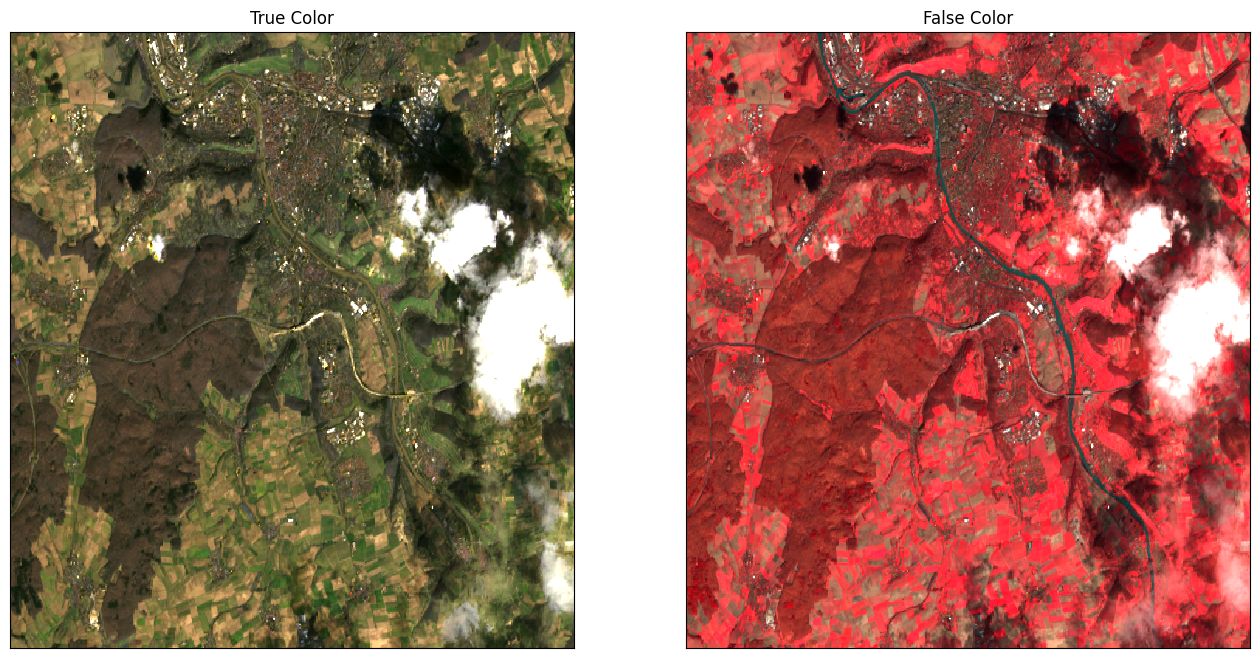

In [45]:
# MODIFY HERE

# Select one of the time slices and create an output image.
# Clouds will be visible in WHITE for an output image

slice = 9  # select the time slice number here

# Select the output image bands
# Users can create other combinations of bands (loaded above), as desired
# True-Color = red, green, blue (this is the common true-color RGB image)
# False Color = swir2, nir, green (this is commonly used for Landsat data viewing)

true_rgb = ds.isel(time=slice)[['red', 'green', 'blue']].to_array()
false_rgb = ds.isel(time=slice)[['nir', 'red', 'green']].to_array()

# Define the plot settings and show the plots
# Users may want to alter the figure sizes or plot titles
# The "vmax" value controls the brightness of the images and can be adjusted

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
true_rgb.plot.imshow(ax=ax[0], vmin=0, vmax=2000)
false_rgb.plot.imshow(ax=ax[1], vmin=0, vmax=3000)
ax[0].set_title('True Color'), ax[0].xaxis.set_visible(False), ax[0].yaxis.set_visible(False)
ax[1].set_title('False Color'), ax[1].xaxis.set_visible(False), ax[1].yaxis.set_visible(False)
plt.show()

Congratulations - you have loaded and plotted your first dataset with ODC and Colab!

Now it's your turn to try having a play by going back and modifying some of the code blocks and running them again. Here are a couple of ideas:

*   [Click here](#modify_slice) to update the `slice` variable in the cell above to view a different time slice (e.g. try `slice = 8`). Use [shift] + [enter] to re-run that cell, and notice the change in clouds!
*   [Click here](#change_lat_lon) to enter a new Lat/Lon location, enter that in the block above the map, and then run successive code blocks to see the data from the region. (Tip: you can find the Lat/Lon in [Google Maps](https://maps.google.com/) by right clicking the map where you're interested and click the lat-long listed to copy it to the clipboard.)
*   [Click here](#platform) to change the platform

[Back to the top](#top)

<a name="explore-applications"></a>
# 5. Publicly available ODC notebooks

A large number of notebooks are already developed and can be used for building your own workflow.


[Digital Earth Australia](https://github.com/GeoscienceAustralia/dea-notebooks)

[Digital Earth Africa](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks)

[ODC Colab notebooks](https://github.com/ceos-seo/odc-colab/tree/master/notebooks)

[Back to the top](#top)

<a name="reference-links"></a>
# 6. Reference Links

*Google Colab and Jupyter Notebooks*

* [What is Google Colab](https://colab.research.google.com/notebooks/intro.ipynb)
* [Introduction to the Jupyter Notebook Environment on Google Colab](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)
* [Description of Jupyter Notebooks from the Jupyter Project](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html)


*Open Data Cube*

* [What is the Open Data Cube?](https://medium.com/opendatacube/what-is-open-data-cube-805af60820d7)
* [opendatacube.org/](https://www.opendatacube.org)
* [github.com/opendatacube](https://github.com/opendatacube)
* [Open Earth Alliance](https://www.openearthalliance.org/)
* [User Forum](https://www.openearthalliance.org/forum)

*Open Data Cube Instances*

* [Digital Earth Australia](https://www.ga.gov.au/dea)
* [Digital Earth Africa](https://www.digitalearthafrica.org/)
* [Swiss Data Cube](https://www.swissdatacube.org/)

[Back to the top](#top)